In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from os import listdir
from os.path import isdir, join

import pickle as pk
import glob

In [29]:
env = "Hopper-v3"
cdir = f"logs/{env}/"

In [33]:
with open("tqc_curves.pkl", "rb") as f:
    tqc_curves = pk.load(f)

In [30]:
def smooth(arr, mask_size):
    s = pd.Series(arr)
    return s.rolling(mask_size).mean()

In [78]:
tqc_rewards = []
sac_rewards = []

for d in listdir(cdir):
    path = join(cdir, d)
    if not isdir(path):
        continue

    if "TQC" in d:
        with np.load(path + "/evaluations.npz") as data:
            tqc_rewards.append(data["results"])
            timesteps = data["timesteps"]

    elif "SAC" in d:
        with np.load(path + "/evaluations.npz") as data:
            sac_rewards.append(data["results"])
        
mask_size = 100

tqc_mean = np.mean(tqc_rewards, axis=(0,2))
tqc_serie = pd.Series(tqc_mean)
tqc_smoothed = tqc_serie.rolling(mask_size).mean()
tqc_std = tqc_smoothed.std()

# sac_mean = np.mean(sac_rewards, axis=(0,2))
# sac_serie = pd.Series(sac_mean)
# sac_convolved = sac_serie.rolling(mask_size).mean()
# sac_std = sac_convolved.std()

IndexError: tuple index out of range

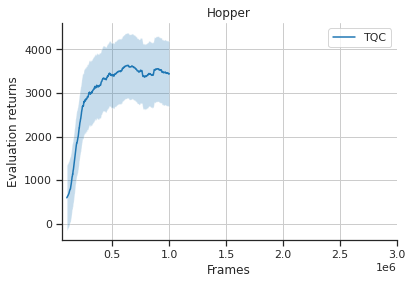

In [12]:
custom_params = {
    "axes.grid": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
}
sns.set_theme(style="ticks", palette="tab10", rc=custom_params)

fig, ax = plt.subplots()

ax.plot(timesteps, tqc_smoothed, label="TQC")
ax.fill_between(timesteps, tqc_smoothed + tqc_std, tqc_smoothed - tqc_std, alpha=0.25)

# ax.plot(timesteps, sac_convolved, label="SAC")
# ax.fill_between(timesteps, sac_convolved + sac_std, sac_convolved - sac_std, alpha=0.25)

ax.set_title(env[:-3])
ax.set_xlabel("Frames")
ax.set_ylabel("Evaluation returns")
ax.set_xlim(xmax=3e6) 
ax.legend() 

fig.show()
fig.savefig(
    f"plots/{env[:-3].lower()}_tqc_sac_smoothed.png", facecolor="white", transparent=False
)